Laboratorio 7

- Cristopher Barrios
- Sebastian Recinos
- Jorge Perez

In [1]:
#Importando libs
import numpy as np
from glob import glob
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import matplotlib.pyplot as plt
from random import randint
from tqdm import tqdm
import pandas as pd
import cv2

Pre-Procesamiento

In [2]:
#Importando dataset
data_dict = {'Adialer.C': [], 
             'Agent.FYI': [], 
             'Allaple.A': [], 
             'Allaple.L': [], 
             'Alueron.gen!J': [], 
             'Autorun.K': [], 
             'C2LOP.gen!G': [], 
             'C2LOP.P': [], 
             'Dialplatform.B': [], 
             'Dontovo.A': [], 
             'Fakerean': [], 
             'Instantaccess': [], 
             'Lolyda.AA1': [], 
             'Lolyda.AA2': [], 
             'Lolyda.AA3': [], 
             'Lolyda.AT': [], 
             'Malex.gen!J': [], 
             'Obfuscator.AD': [], 
             'Rbot!gen': [], 
             'Skintrim.N': [], 
             'Swizzor.gen!E': [], 
             'Swizzor.gen!I': [], 
             'VB.AT': [], 
             'Wintrim.BX': [], 
             'Yuner.A': []}

for i in data_dict:
    try:
        data_dict[i] = glob('./malimg_paper_dataset_imgs/' + i + '/*.png')
        print(i, ': ', len(data_dict[i]))
    
    except:
        print('ERROR en ', i)

for i in data_dict:
    for j in range(len(data_dict[i])):
        
        data_dict[i][j] = data_dict[i][j].replace("\\", '/')
        print(data_dict[i][j])

Adialer.C :  122
Agent.FYI :  116
Allaple.A :  2949
Allaple.L :  1591
Alueron.gen!J :  198
Autorun.K :  106
C2LOP.gen!G :  200
C2LOP.P :  146
Dialplatform.B :  177
Dontovo.A :  162
Fakerean :  381
Instantaccess :  431
Lolyda.AA1 :  213
Lolyda.AA2 :  184
Lolyda.AA3 :  123
Lolyda.AT :  159
Malex.gen!J :  136
Obfuscator.AD :  142
Rbot!gen :  158
Skintrim.N :  80
Swizzor.gen!E :  128
Swizzor.gen!I :  132
VB.AT :  408
Wintrim.BX :  97
Yuner.A :  800
./malimg_paper_dataset_imgs/Adialer.C/000bde2e9a94ba41c0c111ffd80647c2.png
./malimg_paper_dataset_imgs/Adialer.C/000e30a0819ac7ed931d629ce2ef8948.png
./malimg_paper_dataset_imgs/Adialer.C/002f06eff1d222560939be72583d6ae9.png
./malimg_paper_dataset_imgs/Adialer.C/0044f0746b812f6b454ce210bc58c572.png
./malimg_paper_dataset_imgs/Adialer.C/0046a83d932a3d431eb21a99b46d6af7.png
./malimg_paper_dataset_imgs/Adialer.C/004935acac9e9afc9ffbddb20d5460d4.png
./malimg_paper_dataset_imgs/Adialer.C/008a92e720e896caea4a251e6a4c9934.png
./malimg_paper_dataset_img

In [3]:
#Extrayendo media de longitudes mayores a 100 y menores a 200

count = 0
lengths_count = 0

for i in data_dict:
    l = len(data_dict[i])
    if l > 100 and l < 200:
        count += 1
        lengths_count += l

l_mean = int(round(lengths_count/count))

print(count)
print(l_mean, '<----------------- numero de datos a los que se acortaran los mayores a 200')

15
146 <----------------- numero de datos a los que se acortaran los mayores a 200


Emparejando datos

In [4]:
#Se eliminaran los datos menores a 100

to_delete = []

for i in data_dict:
    l = len(data_dict[i])
    if l < 100:
        to_delete.append(i)

print(len(data_dict))

for i in to_delete:
    data_dict.pop(i)

print(len(data_dict))

25
23


In [5]:
#Se acortaran los datos mayores a 200 a la media anteriormente calculada

for i in data_dict:
    l = len(data_dict[i])
    if l > 200:
        indexes_size = l - l_mean
        del_list = []

        for j in range(indexes_size):
            x = randint(0, (l - 1))
            if x not in del_list:
                del_list.append(x)
            
            else:
                dupped = True
                
                while dupped:
                    x = randint(0, (l - 1))
                    if x not in del_list:
                        del_list.append(x)
                        dupped = False
        
        for j in sorted(del_list, reverse=True): 
            del data_dict[i][j]

for i in data_dict:
    print(i, ': ', len(data_dict[i]))




Adialer.C :  122
Agent.FYI :  116
Allaple.A :  146
Allaple.L :  146
Alueron.gen!J :  198
Autorun.K :  106
C2LOP.gen!G :  200
C2LOP.P :  146
Dialplatform.B :  177
Dontovo.A :  162
Fakerean :  146
Instantaccess :  146
Lolyda.AA1 :  146
Lolyda.AA2 :  184
Lolyda.AA3 :  123
Lolyda.AT :  159
Malex.gen!J :  136
Obfuscator.AD :  142
Rbot!gen :  158
Swizzor.gen!E :  128
Swizzor.gen!I :  132
VB.AT :  146
Yuner.A :  146


Plotteando una imagen por cada falimia de malware

C:\Users\jandr\AppData\Local\Temp\ipykernel_23612\396497497.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


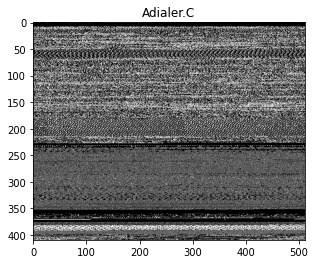

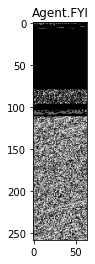

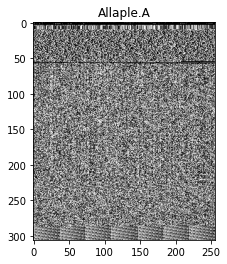

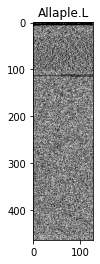

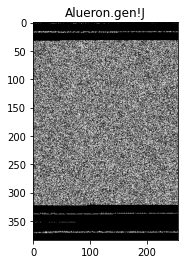

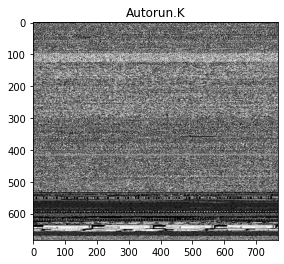

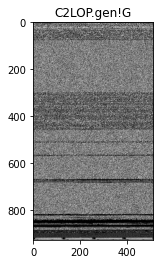

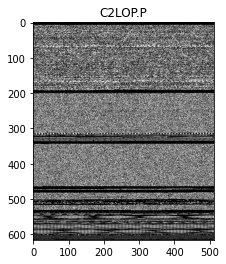

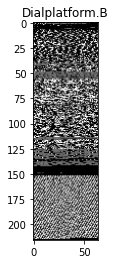

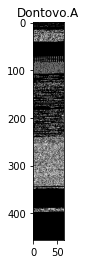

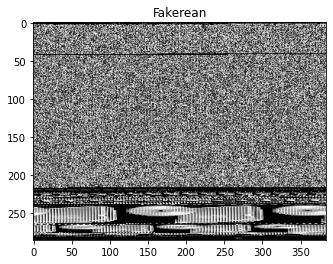

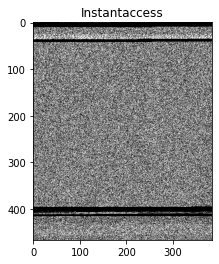

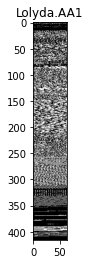

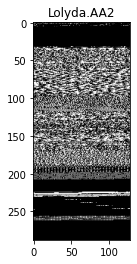

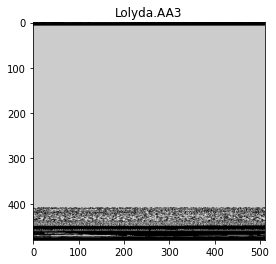

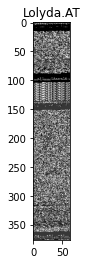

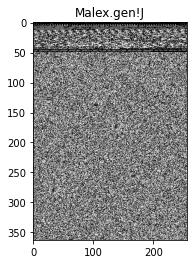

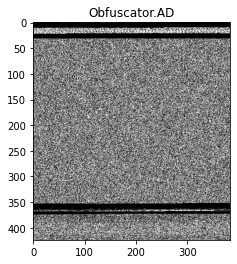

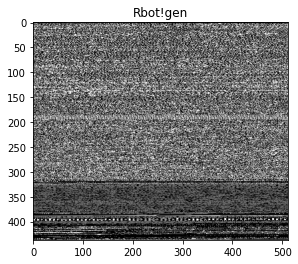

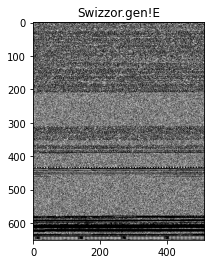

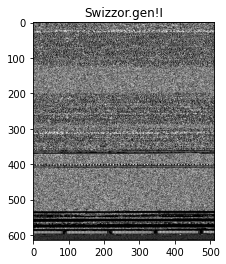

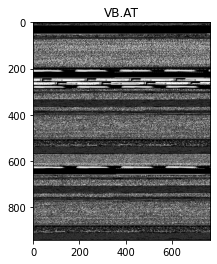

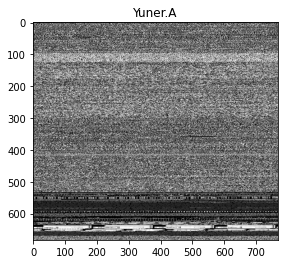

In [6]:
x = randint(0, 100)

images = []

for i in data_dict:
    img = cv2.imread(data_dict[i][x])
    plt.figure()
    plt.title(i)
    plt.imshow(img)